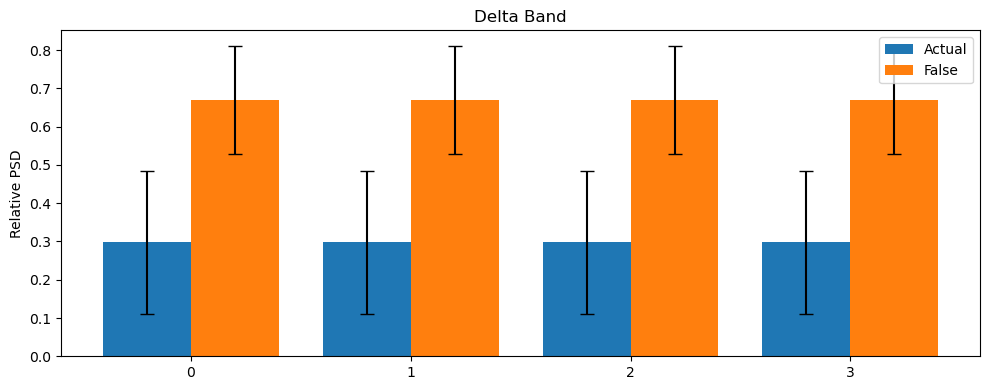

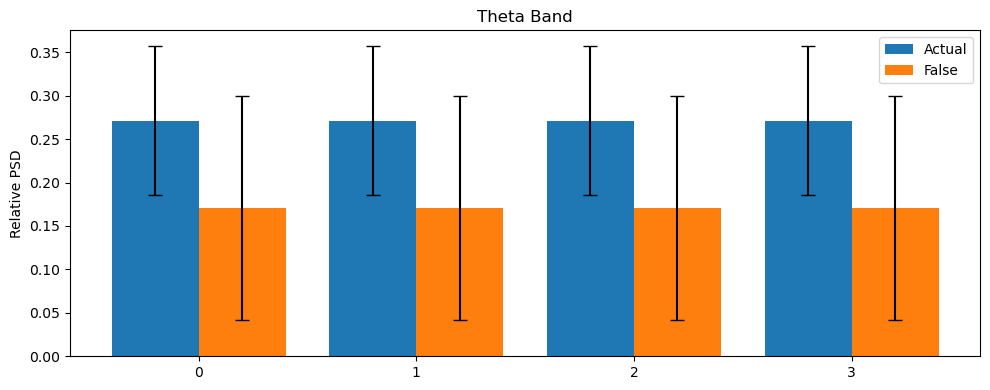

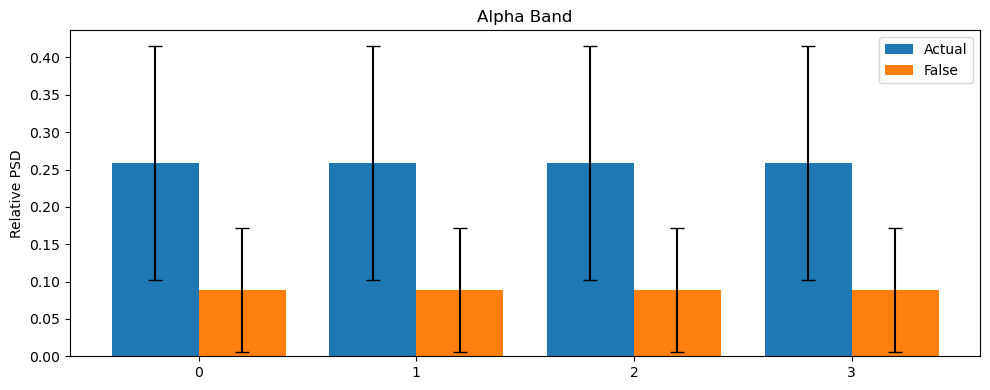

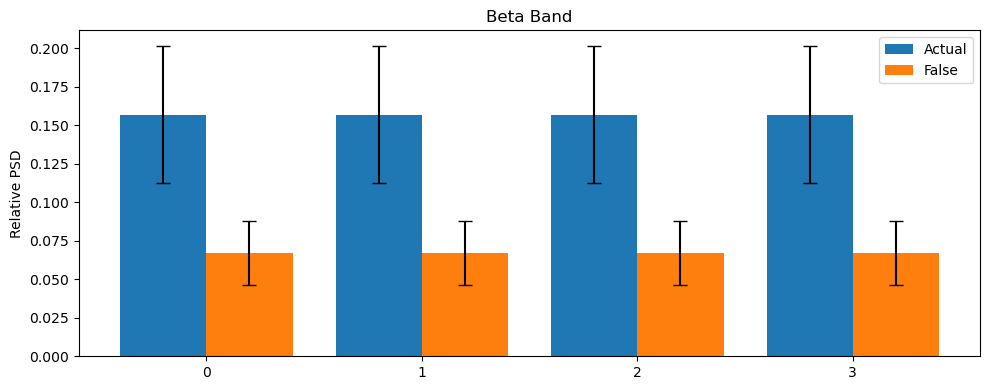

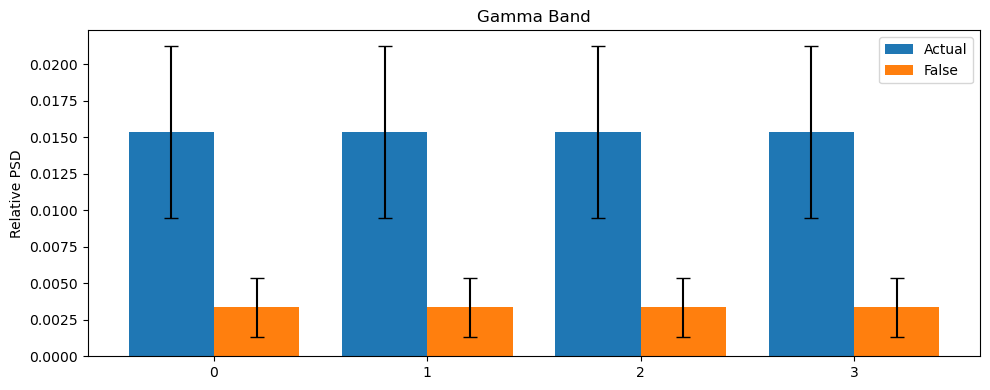

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the Excel files containing the raw PSD data
# Assuming the Excel files have columns for each frequency band
actual_raw_data = pd.read_excel('PSD/Actual/actual_psd_relative.xlsx')
false_raw_data = pd.read_excel('PSD/False/false_psd_relative.xlsx')

# List of frequency bands to process
bands = ['delta', 'theta', 'alpha', 'beta', 'gamma']

# Calculate mean and standard deviation for each band
# Create a DataFrame to hold the mean and standard deviation for the actual PSD
actual_psd = pd.DataFrame({
    'Freq': actual_raw_data.index,  # Assuming frequency data corresponds to the row index
    **{band: actual_raw_data[band].mean() for band in bands},  # Calculate the mean for each band
    **{f'{band}_std': actual_raw_data[band].std() for band in bands}  # Calculate the standard deviation for each band
})

# Create a DataFrame to hold the mean and standard deviation for the false PSD
false_psd = pd.DataFrame({
    'Freq': false_raw_data.index,  # Assuming frequency data corresponds to the row index
    **{band: false_raw_data[band].mean() for band in bands},  # Calculate the mean for each band
    **{f'{band}_std': false_raw_data[band].std() for band in bands}  # Calculate the standard deviation for each band
})

# Generate an array of indices for the frequency bands
x = np.arange(len(actual_psd['Freq']))  # The label locations for the x-axis

# Iterate over each band to create individual bar plots
for band in bands:
    plt.figure(figsize=(10, 4))  # Create a new figure for each band with specified size
    
    # Plot the mean of actual PSD values with error bars representing the standard deviation
    plt.bar(x - 0.2, actual_psd[band], 0.4, yerr=actual_psd[f'{band}_std'], capsize=5, label='Actual')
    
    # Plot the mean of false PSD values with error bars representing the standard deviation
    plt.bar(x + 0.2, false_psd[band], 0.4, yerr=false_psd[f'{band}_std'], capsize=5, label='False')
    
    # Customize the plot
    plt.title(f'{band.capitalize()} Band')  # Set the title of the plot to the current frequency band
    plt.ylabel('Relative PSD')  # Label the y-axis
    plt.xticks(x, actual_psd['Freq'])  # Set the x-ticks to correspond to the frequency labels
    plt.legend(loc='upper right')  # Add a legend to distinguish between actual and false PSD values
    
    # Remove grid lines for a cleaner look
    plt.grid(False)
    
    # Save the figure as an image file
    plt.tight_layout()  # Adjust the layout to prevent clipping of plot elements
    plt.savefig(f'Bar Plots/{band}_band_comparison.png')  # Save the plot as a PNG file in the specified directory
    plt.show()  # Display the plot
